In [439]:
from sklearn import datasets
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [440]:
# K近傍法の近傍数パラメータ k
neighbors = 5
# テストデータ分割のための乱数のシード（整数値）
random_seed = 1
#　テストデータの割合を指定
test_proportion = 0.3
# Iris データセットをロード 
iris = datasets.load_iris()
# 使用する特徴の次元を(Irisの場合は0,1,2,3から)2つ指定．d1とd2は異なる次元を指定すること
d1 = 0
d2 = 1

# すべての行のd1,d2列目の特徴量を取得
X = iris.data[:, [d1, d2]]
# クラスラベルを取得
y = iris.target
# z標準化（平均０、標準偏差1のデータに変換する）
X_std = scale(X)

In [441]:
#入力データXの形状
print(X.shape)

(150, 2)


In [442]:
#10件だけデータを表示
iris['data'][0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [443]:
# 変数test_proportionの割合をテストデータとし，変数random_seedを乱数生成器の状態に設定
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                    test_size = test_proportion, random_state = random_seed)

In [444]:
# クラスKNeighborsClassifierを使用してk近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=neighbors)

In [445]:
# k近傍法のモデルを使って学習を実行
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [446]:
#分類結果
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test  = accuracy_score(y_test, knn.predict(X_test))
print('クラスタ数={},特徴選択={},{}'.format(neighbors, d1, d2))
print('train dataの正解率：{:.1f}%'.format(acc_train*100))
print('test dataの正解率：{:.1f}%'.format(acc_test*100))


クラスタ数=5,特徴選択=0,1
train dataの正解率：85.7%
test dataの正解率：68.9%


In [447]:
def plot_decision_boundary():
    # X_trainの0番目の特徴量の最小値-0,5,最大値+0.5した値を取得
    x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    # X_trainの1番目の特徴量の最小値-0,5,最大値+0.5した値を取得
    x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    #特徴量１，２を最小～最大の間で0.02刻みのデータ点を生成し、meshgridでグリッドデータを生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
                       
    """k近傍法の予測結果を取得
       ravel()で1次元に変換。(328, 269)→ (2,88232)
       predict(予測データ)
      .Tで(2, 88232)　→(88232, 2)に変換(入力データ X_train同じ形状(105,2)へ変換している)
      つまり、0.02刻みで発生させた特徴量データ点xx1,xx2を入力にしてpredictさせた結果をZに格納している。
    """
    Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #マーカー種類の定義
    markers = ('^', 'x', 'o', 's', 'v')
    #色の設定
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    #colorsリストから、出力ｙの種類の数分、色の情報を持ったオブジェクトを生成する。
    cmap = ListedColormap(colors[:len(np.unique(y))])
    

    #プロット図のサイズを指定
    plt.figure(figsize=(7, 7))
    #図の間隔を調整
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    # plt.subplot(行数, 列数, 何番目のプロットか)を指定 
    plt.subplot(2,1,1)
    
    # meshgrid で作った xx1 と xx2、そして高さに相当する予測結果Z を contour に渡す
    # contourf(X軸の配列、Y軸の配列、高さZ)の形式が基本系
    # こうすると、Z（予測結果）の種類毎にcmapの色でプロットされる。
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    # x軸の範囲を特徴量1の最小～最大に指定
    plt.xlim(xx1.min(), xx1.max())
    # y軸の範囲を特徴量2の最小～最大に指定
    plt.ylim(xx2.min(), xx2.max())

    
    """plt.scatter(X,Y)で散布図を描画
       clは今回は０，１，２のラベル
       X_train[y_train == cl, 0]
         → y_trainが特定のラベルの行の0列目のX_trainデータだけを抽出している。
        y_train = 1などとすると以下のようにTrue,Falseのアレイ要素が返ってくるので
        そのTrue,False配列をX_trainのｘ軸のスライスに指定すると、該当ラベルだけの行のX_trainを取得できる。
        array([ True, False, False, False, False, False,  True,  True,  True,
              False,  True,  True,  True)]
    """
    #凡例ラベルの格納リスト
    legend =[]
    for index, color in enumerate(np.unique(y_train)):
        p = plt.scatter(x=X_train[y_train == color, 0], y=X_train[y_train == color, 1],
                    alpha=0.8, c=cmap(index),marker=markers[index], label=color, edgecolors='black')
        legend.append(p)     

    #凡例（正解ラベル情報）の表示
    plt.legend(legend,iris.target_names)
    plt.xlabel('ガクの長さ [sepal length]')
    plt.ylabel('ガクの幅 [sepal width]')
    plt.title('train_data(訓練データ)')
    
    plt.subplot(2,1,2)
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #凡例ラベルの格納リスト
    legend =[]
    for index, color in enumerate(np.unique(y_test)):
        p= plt.scatter(x=X_test[y_test == color, 0], y=X_test[y_test == color, 1],
                        alpha=0.8, c=cmap(index),marker=markers[index], label=color, edgecolors='black')
        legend.append(p)        
        
    #凡例（正解ラベル情報）の表示
    plt.legend(legend,iris.target_names)
    plt.xlabel('ガクの長さ [sepal length]')
    plt.ylabel('ガクの幅 [sepal width]')
    plt.title('train_data(検証データ)')
    plt.show()

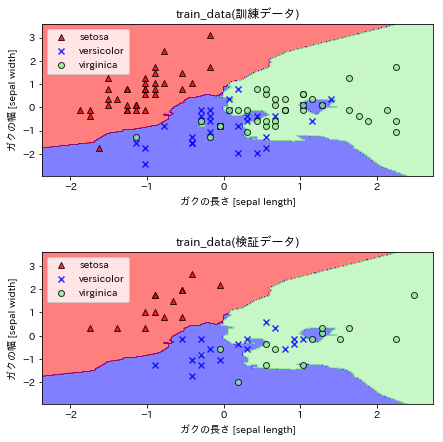

In [448]:
#グラフの描画
plot_decision_boundary()

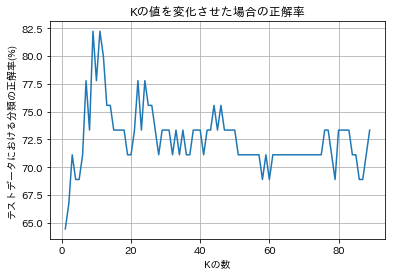

In [449]:
accurate = []
k_range = []
 
for k in range(1, 90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score  = accuracy_score(y_test, knn.predict(X_test))
    accurate.append(score*100)
    k_range.append(k)
    
# X軸に近傍点
# Y軸に評価値
plt.plot(k_range, accurate)
plt.grid()
plt.xlabel('Kの数')
plt.ylabel('テストデータにおける分類の正解率(%)')
plt.title('Kの値を変化させた場合の正解率')
plt.show()